In [103]:
import pandas as pd
import json
import collections
import scipy.io
import numpy as np
from pyvis.network import Network
import matplotlib.pyplot as plt

In [248]:
bus = scipy.io.loadmat('MATPOWER/bus.mat')['bus']
power_demand = bus[:, 2]
df = pd.read_csv("GIS/CATS_gens.csv")
df = df[df['Pmax'] != 0.0].to_numpy()
#df = df.drop_duplicates(subset=['PlantCode','GenID']).to_numpy()
bus_loc = pd.read_csv("GIS/CATS_buses.csv").to_numpy()[:, [4,5]]

In [180]:
gen_by_fuel = collections.defaultdict(float)
for row in df:
    gen_by_fuel[row[3]] += row[5]
gen_by_fuel

defaultdict(float,
            {'Conventional Hydroelectric': 7922.999999999999,
             'Petroleum Liquids': 369.09999999999997,
             'Natural Gas Fired Combustion Turbine': 10893.39999999999,
             'Natural Gas Internal Combustion Engine': 325.5999999999998,
             'Natural Gas Fired Combined Cycle': 19649.300000000007,
             'Natural Gas Steam Turbine': 4744.799999999999,
             'Landfill Gas': 278.6,
             'Batteries': 229.50000000000003,
             'Hydroelectric Pumped Storage': 759.1,
             'Geothermal': 1095.2,
             'Nuclear': 2323.0,
             'Onshore Wind Turbine': 5303.000000000001,
             'Other Waste Biomass': 168.5999999999999,
             'Wood/Wood Waste Biomass': 504.8,
             'Solar Photovoltaic': 11639.398672710053,
             'Solar Thermal without Energy Storage': 1156.00132935,
             'All Other': 113.69999999999999,
             'Conventional Steam Coal': 55.0,
             'O

([<matplotlib.patches.Wedge at 0x1bc65382ed0>,
 [Text(0.008822083223560487, 1.099964622543651, 'Natural Gas'),
  Text(-0.9416798562968521, -0.5685411579162409, 'Solar'),
  Text(-0.3964148472226188, -1.0260873592932855, 'Nuclear'),
  Text(-0.2897713804616283, -1.06114680749902, 'Coal'),
  Text(0.11916644057966173, -1.093526112829307, 'Hydro'),
  Text(0.5372036601415324, -0.9599021968568158, 'Biomass'),
  Text(0.5815088941664028, -0.9337276937123411, 'Other'),
  Text(0.6408366730904249, -0.8940516531064613, 'Geothermal'),
  Text(0.8593296373111293, -0.6866968577463589, 'Wind'),
  Text(1.07269934041913, -0.24354901983864313, 'Import')],
 [Text(0.004812045394669356, 0.5999807032056278, '49.7%'),
  Text(-0.5136435579801011, -0.3101133588634041, '17.8%'),
  Text(-0.21622628030324662, -0.5596840141599738, '3.2%'),
  Text(-0.1580571166154336, -0.57880734954492, '0.1%'),
  Text(0.06499987667981548, -0.5964687888159855, '11.9%'),
  Text(0.29302017825901766, -0.523583016467354, '0.9%'),
  Text(0.

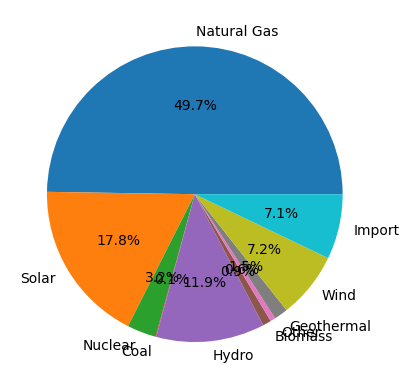

In [141]:
y = [0]*10
for k, v in gen_by_fuel.items():
    if 'Natural Gas' in k or 'Other Gases' in k or 'Petroleum' in k or 'Lanfill' in k:
        y[0] += v
    elif 'Solar' in k or 'Batteries' in k:
        y[1] += v
    elif 'Nuclear' in k:
        y[2] += v
    elif 'Coal' in k:
        y[3] += v
    elif 'Hydro' in k:
        y[4] += v
    elif 'Biomass' in k:
        y[5] += v
    elif 'Geothermal' in k:
        y[7] += v
    elif 'Wind' in k:
        y[8] += v
    elif 'IMPORT' in k:
        y[9] += v
    else:
        y[6] += v
gen_by_fuel
x = ['Natural Gas', 'Solar','Nuclear','Coal','Hydro','Biomass','Other','Geothermal','Wind','Import']
fig, ax = plt.subplots()
ax.pie(y, labels=x,autopct='%1.1f%%')

In [142]:
gen_emission = pd.read_excel("emissions2019.xlsx")
gen_emission = gen_emission[gen_emission['Generation (kWh)'] > 0]
gen_emission = gen_emission[gen_emission['State'] == 'CA']
gen_emission = gen_emission[['Plant Code','Fuel Code','Aggregated Fuel Group','Generation (kWh)','Metric Tonnes of CO2 Emissions','carbon emission rate']]
gen_emission.groupby(['Aggregated Fuel Group'])['carbon emission rate'].mean()
# get carbon emssion rate of each fuel type (tons/mWh)

Aggregated Fuel Group
COAL    4.668269
GAS     0.646560
GEO     0.026307
MSW     0.834394
PET     1.162800
Name: carbon emission rate, dtype: float64

In [143]:
gen_emission.groupby(['Fuel Code'])['carbon emission rate'].mean()

Fuel Code
BIT    4.642909
DFO    1.246614
GEO    0.026307
JF     1.180994
MSW    0.834394
NG     0.646560
PG     1.100864
RC     4.693628
WO     0.534195
Name: carbon emission rate, dtype: float64

In [144]:
type_to_emission = collections.defaultdict(float)
type_to_emission['Conventional Hydroelectric'] = 0.001
type_to_emission['Hydroelectric Pumped Storage'] = 0.001
type_to_emission['Petroleum Liquids'] = 1.162800
type_to_emission['Natural Gas Internal Combustion Engine'] = 0.646560
type_to_emission['Natural Gas Fired Combined Cycle'] = 0.646560
type_to_emission['Natural Gas Steam Turbine'] = 0.646560
type_to_emission['Natural Gas Fired Combustion Turbine'] = 0.646560
type_to_emission['Nuclear'] = 0.001
type_to_emission['Geothermal'] = 0.026307
type_to_emission['Onshore Wind Turbine'] = 0.001
type_to_emission['Other Waste Biomass'] = 0.01
type_to_emission['Wood/Wood Waste Biomass'] = 0.01
type_to_emission['Landfill Gas'] = 0.646560
type_to_emission['Solar Photovoltaic'] = 0.001
type_to_emission['Solar Thermal without Energy Storage'] = 0.001
type_to_emission['Conventional Steam Coal'] = 4.668269
type_to_emission['Other Gases'] = 0.646560
type_to_emission['Batteries'] = 0.001
type_to_emission['Petroleum Coke'] = 1.162800
type_to_emission['Municipal Solid Waste'] = 0.834394
type_to_emission['Other Natural Gas'] = 0.604
type_to_emission['All Other'] = 0.1
type_to_emission['IMPORT'] = 0.5
#type_to_emission['Synchronous Condenser'] = 884

In [249]:
branch_ = scipy.io.loadmat('MATPOWER/branch.mat')['brach']
branch_from_bus = list(map(int, branch_[:, 0]-1))
branch_to_bus = list(map(int, branch_[:, 1]-1))
line_to_nodes = [list( map(int,i) ) for i in branch_[:, 0:2]-1]


In [250]:
f = open("pf_solution.json")
gen_by_fuel = collections.defaultdict(float)
sol = json.load(f)
gen = [0]*2149
gen_cost = [0]*2149
power_generation = [0]*2149
carbon_emission = [0]*2149
branch_power_to = [0]*10823
branch_power_from = [0]*10823
res = []
for line, val in sol['solution']['gen'].items():
    if val['pg'] != 0.0:
        gen[int(line)-1] = df[int(line)-1][2]-1
        carbon_emission[int(line)-1] = type_to_emission[df[int(line)-1][3]]
        gen_by_fuel[df[int(line)-1][3]] += val['pg']*100
        gen_cost[int(line)-1] = val['pg_cost']
        power_generation[int(line)-1] = val['pg']*100

for line, val in sol['solution']['branch'].items():
    branch_power_from[int(line)-1] = val['pf']*100
    branch_power_to[int(line)-1] = val['pt']*100

f.close()

In [251]:
graph = collections.defaultdict(list) # from: (to, line)
graph_reverse = collections.defaultdict(list) # to: (from, line)
for i, (from_bus, to_bus) in enumerate(line_to_nodes):
    graph[from_bus].append((to_bus, i))
    graph_reverse[to_bus].append((from_bus, i))
for i, f in enumerate(branch_power_from):
    if f < 0.0:
        from_node, to_node = line_to_nodes[i]
        graph[from_node].remove((to_node, i))
        graph[to_node].append((from_node, i))
        graph_reverse[to_node].remove((from_node, i))
        graph_reverse[from_node].append((to_node, i))
        branch_power_from[i] = -f

In [214]:
num_bus = len(bus)
num_branch = len(branch_from_bus)
num_gen = len(gen)
print("Number of transmission lines and transformers: " + str(num_branch))
print("Number of buses: " + str(num_bus))
print("Number of generators: " + str(num_gen))

Number of transmission lines and transformers: 10823
Number of buses: 8870
Number of generators: 2149


In [252]:
# Kahn's algo
def topo_order_kahn(graph):
    in_degree = [0]*num_bus
    for i in range(num_bus):
        for nei, _ in graph[i]:
            in_degree[nei] += 1
    q = []
    for i in range(num_bus):
        if in_degree[i] == 0:
            q.append(i)
    index = 0
    order = [0]*num_bus
    while q:
        at = q.pop(0)
        order[index] = at
        index += 1
        for nei, _ in graph[at]:
            in_degree[nei] -= 1
            if in_degree[nei] == 0:
                q.append(nei)
    return in_degree

In [185]:
# find cycles
def dfs_cycle(graph, n, visiting, curPath, start, visited, cycles):
    if visiting[n]:
        #if n == start:
        idx = curPath.index(n)
        cycles.add(frozenset(curPath[idx:]))
        for j in curPath[idx:]:
            visited[j] = True
        return
    visiting[n] = True
    curPath.append(n)
    for nei, _ in graph[n]:
        dfs_cycle(graph, nei, visiting, curPath, start, visited, cycles)
    visiting[n] = False
    curPath.pop(-1)
    
cycles = set()
visited = [False]*num_bus
for n in range(num_bus):
    if not visited[n]:
        start = n
        visiting = [False]*num_bus
        dfs_cycle(graph, n, visiting, [], start, visited, cycles)

KeyboardInterrupt: 

In [253]:
# find number of components in graph
visited = set()
num_components = 0
def find_components(graph, n, visited):
    if n in visited: return
    visited.add(n)
    for nei, _ in graph[n]:
        find_components(graph, nei, visited)
for n in range(num_bus):
    if n not in visited:
        find_components(graph, n, visited)
        num_components += 1
num_components
# we get num_compoents = 770

820

In [255]:
def update_graph_DAG(graph, c):
    for b in c:
        for nei, line in graph[b]:
            if nei in c:
                branch_power_from[line] = 0
                graph[b].remove((nei, line))
        for nei, line in graph_reverse[b]:
            if nei in c:
                branch_power_from[line] = 0
                if (b, line) in graph[nei]:
                    graph[nei].remove((b, line))
        if b != c[0]:
            for nei, line in graph[b]:
                if nei not in c:
                    graph[c[0]].append((nei, line))
                    graph[b].remove((nei, line))
            for nei, line in graph_reverse[b]:
                if nei not in c:
                    graph[nei].append((c[0], line))
                    if (b, line) in graph[nei]:
                        graph[nei].remove((b, line))
            graph[b] = []
    return graph

In [256]:
# Tarjan's Strongly Connected Component (SCC) Algorithm
UNVISITED = -1
id = [0]
sccCount = [0]
ids = [0]*num_bus
low = [0]*num_bus
onStack = [False]*num_bus
stack = []
def findSccs():
    for i in range(num_bus): ids[i] = UNVISITED
    for i in range(num_bus):
        if ids[i] == UNVISITED:
            tarjan_dfs(i)
    return low
def tarjan_dfs(at):
    stack.append(at)
    onStack[at] = True
    ids[at] = id[0]
    low[at] = id[0]
    id[0] += 1
    for nei, _ in graph[at]:
        if ids[nei] == UNVISITED:
            tarjan_dfs(nei)
        if onStack[nei]:
            low[at] = min(low[nei], low[at])
    if ids[at] == low[at]:
        while stack:
            node = stack.pop(-1)
            onStack[node] = False
            low[node] = ids[at]
            if node == at: break
        sccCount[0] += 1

In [258]:
sccs = collections.defaultdict(list)
seen = []
edges = findSccs()
for i, v in enumerate(edges):
    if v in seen:
        sccs[v].append(i)
        sccs[v].append(seen.index(v))
    seen.append(v)
cycles = set()
for k, v in sccs.items():
    cycles.add(frozenset(v))

In [190]:
# DC
cycles

{frozenset({1537, 2929, 2930, 2931, 3492})}

In [205]:
# AC
cycles

{frozenset({7042, 7619, 8039}),
 frozenset({1537, 2929, 2930, 2931, 3492}),
 frozenset({6773, 7887}),
 frozenset({1839, 7603}),
 frozenset({1861, 2378, 6727, 6728, 7618})}

In [260]:
net = Network(directed=True)
nodes = []
for c in cycles:
    for b in c:
        nodes.append(b)
addi_nodes = []
for n in nodes:
    for nei, _ in graph[n]:
        if nei not in nodes:
            addi_nodes.append(nei)
    for nei, _ in graph_reverse[n]:
        if nei not in nodes:
            addi_nodes.append(nei)
nodes = nodes + addi_nodes
location = []
title = []
value = []
for n in nodes:
    location.append(list(bus_loc[n]))
    title.append("Node " + str(n))
    value.append(power_demand[n])
location = np.array(location)
net.add_nodes(nodes, value=value,label = title, x = location[:,0], y = location[:,1])
for n in nodes:
    for nei, line in graph[n]:
        if nei in nodes:
            net.add_edge(n, nei, weight=branch_power_from[line], label=str(round(branch_power_from[line],2)))
net.toggle_physics(True)
net.show('mygraph.html', notebook=False)

mygraph.html


In [261]:
for c in cycles:
    c = list(c)
    print(c)
    total_demand = 0
    total_gen = 0
    for b in c:
        total_demand += power_demand[b]
        idx = gen.index(b) if b in gen else -1
        if idx != -1:
            total_gen += power_generation[idx]
    power_demand[c[0]] = total_demand
    idx = gen.index(b) if b in gen else -1
    if idx != -1:
        power_generation[gen.index(c[0])] = total_gen
    graph = update_graph_DAG(graph, c)

[1537, 3492, 2929, 2930, 2931]


In [262]:
graph_reverse = collections.defaultdict(list)
for f, v in graph.items():
    for t, line in v:
        graph_reverse[t].append((f, line))

In [263]:
in_d = topo_order_kahn(graph)
for i, v in enumerate(in_d):
    if v > 0:
        print(i)

In [264]:
line_to_gen = collections.defaultdict(set)
node_to_gen = collections.defaultdict(set)
def dfs(g, n, visited):
    if n in visited: return
    visited.add(n)
    node_to_gen[n].add(g)
    for nei, line in graph[n]:
        line_to_gen[line].add(g)
        dfs(g, nei, visited)
for i, g in enumerate(gen):
    visited = set()
    dfs(g, g, visited)
line_prop_mat=np.zeros((num_gen, num_branch), dtype=float)
bus_prop_mat=np.zeros((num_gen, num_bus), dtype=float)
# initially, if node_to_gen only has 1 generator, bus_prop_mat start with 1
for k, v in node_to_gen.items():
    if len(v) == 1:
        idx = list(gen).index(list(v)[0])
        bus_prop_mat[idx][int(k)] = 1.0
for k, v in line_to_gen.items():
    if len(v) == 1:
        idx = list(gen).index(list(v)[0])
        line_prop_mat[idx][int(k)] = 1.0
# visit nodes in topological order
# step 1: calculate bus_prop based on in flowing lines_prop
# step 2: calculate line_prop of out flowing lines
in_degree = collections.defaultdict(int)
for i, v in graph_reverse.items():
    in_degree[i] = len(v)
q = [] # list of nodes with no inflow
topo_order = []
for g in gen:
    if in_degree[g] == 0:
        q.append(g)
while q:
    cur = int(q.pop(0))
    if len(node_to_gen[cur]) > 1:
        out_total = power_demand[cur]
        for nei, out_line in graph[cur]:
            out_total += branch_power_from[out_line]
        
        for g in node_to_gen[cur]:
            idx = list(gen).index(g)
            if cur == g:
                if out_total > 0.000001: 
                        #print("Power gen: " + str(power_generation[idx]))
                    bus_prop_mat[idx][cur] = power_generation[idx]/out_total
            else:
                for nei, in_line in graph_reverse[cur]:
                    if out_total > 0.000001: 
                        bus_prop_mat[idx][cur] += branch_power_from[in_line]*line_prop_mat[idx][in_line]/out_total
        for g in node_to_gen[cur]:
            idx = list(gen).index(g)
            for nei, out_line in graph[cur]:
                line_prop_mat[idx][out_line] = bus_prop_mat[idx][cur]

    topo_order.append(cur)
    for nei, line in graph[cur]:
        in_degree[nei] -= 1
        if in_degree[nei] == 0:
            q.append(nei)
carbon_vec = np.zeros((num_bus, 1), dtype=float)
bus_prop_mat_prop = np.zeros((num_gen, num_bus), dtype=float)
for i in range(num_gen):
    s = np.sum(bus_prop_mat[i])
    for j in range(num_bus):
        if s != 0.0:
            bus_prop_mat_prop[i][j] = bus_prop_mat[i][j]/s

for i in range(num_bus):
    for j in range(num_gen):
        #load[i] += bus_prop_mat[j,i] * power_generation.value[j]
        carbon_vec[i] += bus_prop_mat_prop[j,i] * power_generation[j] * carbon_emission[j]
total_cost = sum(gen_cost)
total_carbon = sum(carbon_vec)


In [265]:
total_carbon

array([3492.50759083])

In [251]:
# in_degree_list = [0]*num_bus
# for k, v in in_degree.items():
#     in_degree_list[int(k)] = v
# def dfs_cycle(n, visited, total_gen, temp, in_degree_list):
#     if n in visited: return
#     visited.add(n)
#     if n in gen:
#         total_gen[0] += power_generation[gen.index(n)]
#         temp[n] = power_generation[gen.index(n)]
#     for nei, _ in graph[n]:
#         if in_degree_list[int(nei)] > 0:
#             dfs_cycle(int(nei), visited, total_gen, temp, in_degree_list)
#             in_degree_list[int(nei)] -= 1

In [185]:
# for i in range(len(in_degree_list)):
#     if in_degree_list[i] > 0 and i in gen and power_generation[gen.index(i)] > 0.000001 and len(graph[i]) != 0:
#         total_gen = [0.0]
#         visited = set()
#         temp = collections.defaultdict(float)
#         dfs_cycle(i, visited, total_gen, temp, in_degree_list)
#         if total_gen != 0:
#             for k, v in temp.items():
#                 print(v/total_gen[0])
#                 bus_prop_mat[gen.index(k)][k] = v/total_gen[0]


In [266]:
max(np.sum(np.array(bus_prop_mat_prop), axis=1))

1.0000000000000004

In [267]:
total_cost

752160.4906307299

In [268]:
avg_carbon_emission_rate_node = carbon_emission @ bus_prop_mat_prop

In [269]:
total_carbon/sum(power_demand) # metric tonnes/MWh

array([0.07935909])

In [270]:
df_ = pd.read_csv("GIS/CATS_buses.csv")
df_.insert(3, 'avg carbon emission', avg_carbon_emission_rate_node)
df_.to_csv('GIS/CATS_buses_output.csv', index=False)

In [271]:
df_ = pd.read_csv("GIS/CATS_gens.csv")
df_ = df_[df_['Pmax'] != 0.0]
df_.insert(2, 'power_gen', power_generation)
df_.to_csv('GIS/CATS_power_gen_output.csv', index=False)